In [1]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

import sys
import os

import datetime
import matplotlib.pyplot as plt
import numpy as np
import numba
import pandas as pd
import pprint

from IPython.display import clear_output
from IPython.display import display

#from pax_utils import utils_event
#from pax_utils import file_utils
#from pax_utils import interaction_utils
#from pax_utils import numeric_utils
#from pax_utils import s1s2_utils
#from pax_utils import waveform_pax_utils
#from pax_utils import waveform_utils

#from pax.configuration import load_configuration


In [56]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

f_merge        = 'temp_s2/strArr_dir3.npy'
strArr         = np.load(f_merge)
arr_sum_wf     = np.sum(strArr[:]['image'], axis=1)
arr_s2_areas   = strArr[:]['s2_areas']
arr_width_s2   = strArr[:]['right']- strArr[:]['left']
arr_width_true = strArr[:]['true_right']- strArr[:]['true_left']

x_true = strArr[:]['true_x']
x_reco = strArr[:]['x']
y_true = strArr[:]['true_y']
y_reco = strArr[:]['y']

print(arr_s2_areas.shape)
print(arr_sum_wf.shape)
print()
print(arr_width_true[0])
print(arr_width_s2[0])



(1000, 127)
(1000, 1000)

531
608



Error! Sum of Waveform NOT Equal to Sum of Areas!

Sum of S2 areas:             314.0
Sum of S2 summ waveform:     148.6
Sum of areas minus waveform: 165.4


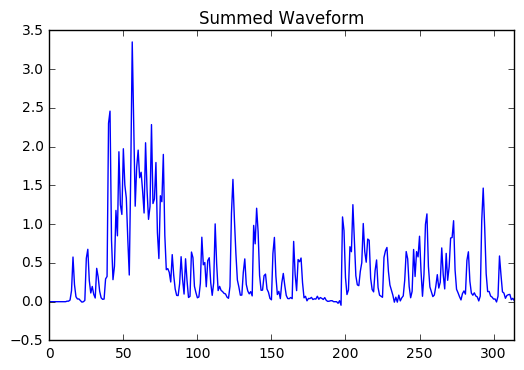

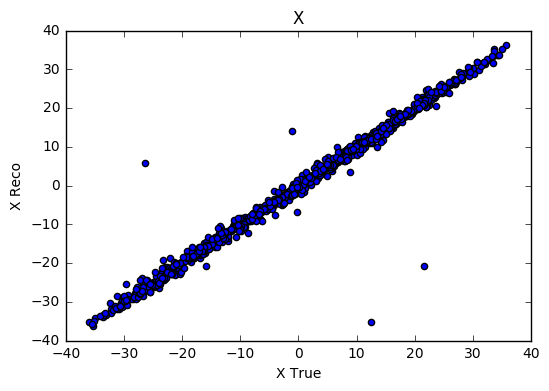

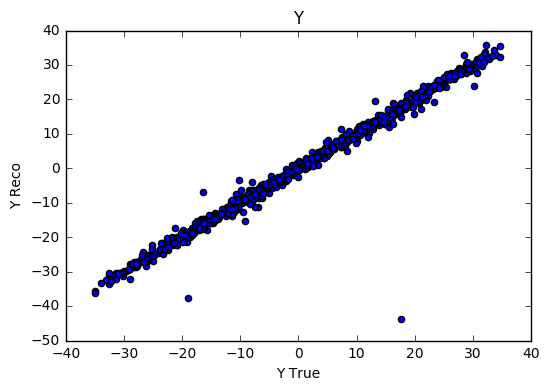

In [62]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

sum_wf    = np.sum(arr_sum_wf[idx])
sum_areas = np.sum(arr_width_s2[idx])
diff      = sum_areas - sum_wf
eq        = np.isclose(sum_wf, sum_areas)

if not (eq):
    print("\nError! Sum of Waveform NOT Equal to Sum of Areas!\n")
    print("Sum of S2 areas:             {0:.1f}".format(sum_areas))
    print("Sum of S2 summ waveform:     {0:.1f}".format(sum_wf))
    print("Sum of areas minus waveform: {0:.1f}".format(diff))
    
    
idx = 2

plt.figure()
plt.plot(arr_sum_wf[idx])
plt.xlim([0, arr_width_s2[idx]])
plt.title("Summed Waveform")

plt.figure()
plt.scatter(x_true, x_reco)
plt.xlabel("X True")
plt.ylabel("X Reco")
plt.title("X")

plt.figure()
plt.scatter(y_true, y_reco)
plt.xlabel("Y True")
plt.ylabel("Y Reco")
plt.title("Y")
